In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./msbd-project-data1/a/a.csv',error_bad_lines=False,sep='|')
df.shape
# lines = []
# with open('./msbd-project-data1/b/a.csv') as f:
#     for line in f:
#         l = line.split(',')
#         l[7:-4]=[','.join(l[7:-4])]
#         lines.append(l)
# df = pd.DataFrame(lines,columns = ['id','uid','nicename','marks','caseid','engid','engineer','content','type','is_flag','send_time','create_time'])

b'Skipping line 1964: expected 8 fields, saw 9\nSkipping line 3002: expected 8 fields, saw 9\nSkipping line 7243: expected 8 fields, saw 9\nSkipping line 14038: expected 8 fields, saw 9\nSkipping line 26871: expected 8 fields, saw 9\nSkipping line 26874: expected 8 fields, saw 9\nSkipping line 42609: expected 8 fields, saw 10\nSkipping line 46446: expected 8 fields, saw 10\nSkipping line 46517: expected 8 fields, saw 10\nSkipping line 56296: expected 8 fields, saw 9\nSkipping line 56992: expected 8 fields, saw 9\nSkipping line 61649: expected 8 fields, saw 10\n'


(70806, 8)

In [11]:
print(df.columns)
df.columns = ['sessionid','id','acceptnumber','requesttime','request','serviceid','responsetime','response']
df.iloc[10:20]

Index(['sessionid', 'id', 'acceptnumber', 'requesttime', 'request',
       'serviceid', 'responsetime', 'response'],
      dtype='object')


,sessionid,id,acceptnumber,requesttime,request,serviceid,responsetime,response
10,13410000258T16081911402229APP,73,10000000258,31DEC99:00:00:00,-1,SZ31537,19AUG16:11:46:07,好的
11,13410000258T16081911402229APP,74,10000000258,31DEC99:00:00:00,-1,SZ31537,19AUG16:11:46:17,如果没有其他业务，小和先退下了，收到10086046短信后请回复数字1，赏赐小和本人1008...
12,13410000258T16081911402229APP,75,10000000258,19AUG16:11:46:43,可以了谢谢,SZ31537,31DEC99:00:00:00,-1
13,13410000258T16081911402229APP,76,10000000258,31DEC99:00:00:00,-1,SZ31537,19AUG16:11:46:51,不客气
14,13410000422T16082318212113APP,118,10000000422,23AUG16:18:21:25,人工,SZ31908,31DEC99:00:00:00,-1
15,13410000422T16082318212113APP,119,10000000422,23AUG16:18:21:26,Hello,SZ31908,31DEC99:00:00:00,-1
16,13410000422T16082318212113APP,120,10000000422,31DEC99:00:00:00,-1,SZ31908,23AUG16:18:21:31,Hi~欢迎来到真人版小和SZ31908的世界里，我先给您点【10086个赞】请问有什么可以帮...
17,13410000422T16082318212113APP,121,10000000422,23AUG16:18:22:03,查询我现在的套餐,SZ31908,31DEC99:00:00:00,-1
18,13410000422T16082318212113APP,122,10000000422,31DEC99:00:00:00,-1,SZ31908,23AUG16:18:22:44,亲，您改了38元4G飞享套餐，9-13号生效哦
19,13410000422T16082318212113APP,123,10000000422,31DEC99:00:00:00,-1,SZ31908,23AUG16:18:24:04,亲，还在线吗，还有其他可以帮到您吗？


In [4]:
df.shape[0]-df.count()

会话ID     0
记录流水号    0
受理号码     0
请求时间     0
请求内容     1
回复工号     1
回复时间     1
回复内容     1
dtype: int64

In [47]:
df = df.dropna(how='any')

### sessionid,request,response unique distribution:

In [48]:
df.sessionid.unique().shape,df.request.unique().shape,df.response.unique().shape,df.shape

((4055,), (18062,), (26143,), (70805, 8))

### **average talk-times per session**:

In [51]:
df.groupby('sessionid').count().id.mean()

17.461159062885326

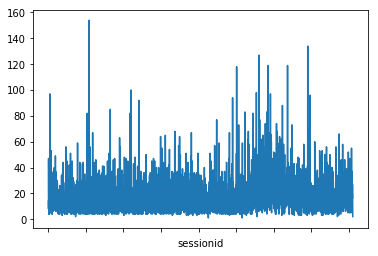

In [26]:
df.groupby('sessionid').count()['id'].plot()

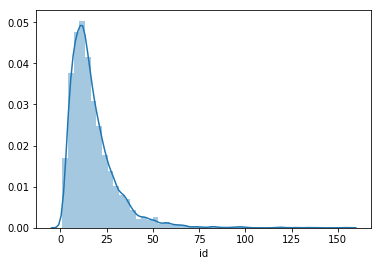

In [28]:
sns.distplot(df.groupby('sessionid').count().id)

### Top same sentences

In [52]:
df.groupby('response').count().id.sort_values(ascending=False)[:10]

response
-1                                                                                                 31159
请稍等                                                                                                  914
亲，很难过没收到您的回复，系统在1分钟没收到您的回应会自动离线，稍后【收到10086046短信后请回复1】，赏赐小和本人【10086个赞】，小和吃饭还是喝粥全靠它了，其它都不是满赞喔[担心]      299
茫茫人海与你相遇深感荣幸，以后有需要请记得第一时间找在线客服哦！稍后【收到10086046短信后请回复1】，赏赐小和本人【10086个赞】，小和吃饭还是喝粥全靠它了，其它都不是满赞喔[担心]      266
亲，您已进入人工服务，可直接输入文字提问，例如：【1】咨询4G优惠【2】查询剩余流量【3】办理4G流量套餐……等等哦                                           200
呃...小和有点不明白，请换种问法或关键字（如：查询话费）试试，您也可以输入【人工】进入人工客服咨询！<br/>                                             158
[微笑]                                                                                                 148
是的                                                                                                   119
好的                                                                                                   114
小和还有什么可以为您效劳吗？                                

目前的目标：  

针对会话中的关键句子的进行意图分析？  
1.暂时不考虑上下文的语境？  
2.针对会话中的关键句子的进行意图分析 or multi-turn/single-turn QA system  


思路1：聚类+分类  
response做聚类（优势是回答标准，），从而对request打label：  
思路2：两者  
response或者request 做LDA （）  
思路3：聚类  
对request进行聚类，作为label  
思路4：  
人工打label，找关键句子  
思路5：  
匹配规则，人工智障  

意图label 映射到 action的种类—》转到对应的操作  

预计步骤  
- 数据清洗:  
	1.在request和response里去除无效句子  
		方法：通过高频句子逆序去除？  
	2.核心回话筛选  
		方法：？ 探讨一下  


- 寻找意图问答  
	将数据整理成，【(关键问题句,业务回答句)…….】  
- 对句子进行分词、标注、关键词等操作？  
- 选取xx相似算法，对response进行聚类  
	1. 聚类的种类即是 意图的分类、即label  
	2. 如何判断聚类好坏  
- RNNmodel， request作为输入，response作为输出  

问题  
- 最终达到的效果  
 是否要做到QA这一步，多伦对话  
 user intension 以业务分还是以 using pattern 分 是不是要结合小i机器人的具体需求  
- 去除无效句子的方法  
- 相似算法、聚类算法的而选择建议是什么？  
- 
问题  
1. 如何处理问答形式  
2. 如何提取有价值的信息  
3. 哪个方法好  
4. 最近的三个response作为一个句子  

步骤：

* 用户意图定义
    * 用户意图层级
        * 缴费－网络缴费／话费缴费
    * 拿到［数据清洗输出］后打标签，衡量聚类效果
* 数据清洗
    * 删除垃圾信息，去掉重复语句
    * 输出：
        * column 0: conversation ID
        * column 1：用户问题／关键句
        * column 2:  对应客服回答（先问后答）
        * column 3: Label （Null）
* 聚类算法
    * 搭建模型框架 
        * word segmentation -> word vector -> sentence vector -> clustering (K-means/LDA/...)
    * 拿到［数据清洗输出］后，可以直接使用
    * Evaluation: Ground truth  
* 建模
    * 双向RNN＋attention 
        * 字向量／词向量
        * 输出 label
    * …..
    * Ensemble